In [32]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_divvy_data.csv")

In [12]:
df['ride_length'] = pd.to_timedelta(df['ride_length'])
summary_stats = df.groupby('member_casual')['ride_length'].describe()
print(summary_stats)


                 count                       mean                        std  \
member_casual                                                                  
casual         1533250  0 days 00:24:01.743159983  0 days 00:50:11.533593506   
member         2740011  0 days 00:12:27.516006517  0 days 00:22:46.994765608   

                                  min                     25%  \
member_casual                                                   
casual         0 days 00:00:00.103000  0 days 00:07:30.142250   
member         0 days 00:00:00.139000         0 days 00:05:13   

                                  50%                     75%              max  
member_casual                                                                   
casual         0 days 00:13:23.291500  0 days 00:25:36.140250  1 days 01:09:22  
member                0 days 00:08:49  0 days 00:15:00.811000  1 days 00:57:39  


In [18]:
# Step 1: Ensure ride_length is a timedelta
df['ride_length'] = pd.to_timedelta(df['ride_length'], errors='coerce')  # force invalid to NaT

# Step 2: Drop rows with missing or negative durations
df = df[df['ride_length'].notnull()]
df = df[df['ride_length'] > pd.Timedelta(0)]

# Step 3: Group and describe
summary_stats_clean = df.groupby('member_casual')['ride_length'].describe()

# Step 4: Convert timedelta to minutes
for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    summary_stats_clean[col] = summary_stats_clean[col].apply(lambda x: x.total_seconds() / 60)

# Step 5: Round for readability
summary_stats_clean = summary_stats_clean.round(2).reset_index()

# Step 6: Display clean summary
print(summary_stats_clean)


  member_casual    count   mean    std  min   25%    50%    75%      max
0        casual  1533250  24.03  50.19  0.0  7.50  13.39  25.60  1509.37
1        member  2740011  12.46  22.78  0.0  5.22   8.82  15.01  1497.65


Text(0, 0.5, 'Duration (minutes)')

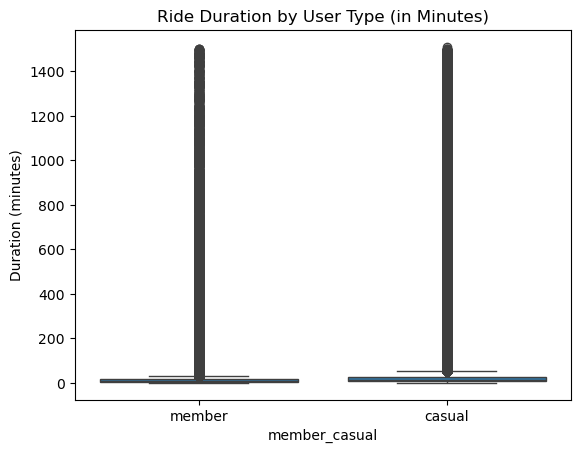

In [30]:
# Ride length boxplot
sns.boxplot(x='member_casual', y=df['ride_length'].dt.total_seconds() / 60, data=df)
plt.title("Ride Duration by User Type (in Minutes)")
plt.ylabel("Duration (minutes)")

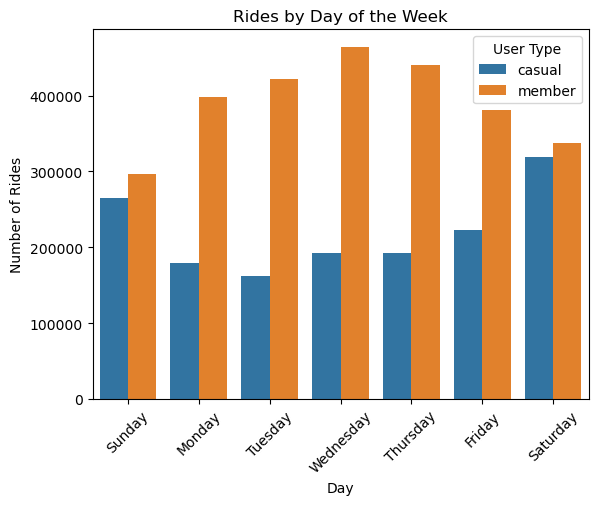

In [22]:
# Count of rides by user type and weekday
rides_by_day = df.groupby(['member_casual', 'day_of_week']).size().reset_index(name='ride_count')

# Sort by weekday
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
rides_by_day['day_of_week'] = pd.Categorical(rides_by_day['day_of_week'], categories=weekday_order, ordered=True)

# Bar plot
sns.barplot(data=rides_by_day, x='day_of_week', y='ride_count', hue='member_casual')
plt.title("Rides by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.legend(title="User Type")
plt.xticks(rotation=45)
plt.show()


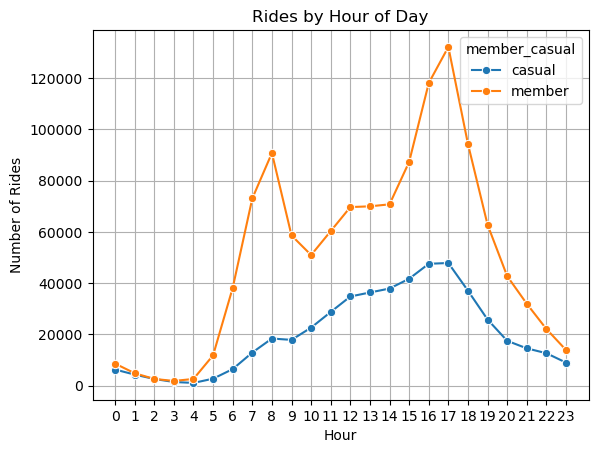

In [34]:
# Ensure started_at is datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['start_hour'] = df['started_at'].dt.hour

# Group by hour
rides_by_hour = df.groupby(['member_casual', 'start_hour']).size().reset_index(name='ride_count')

# Line plot
sns.lineplot(data=rides_by_hour, x='start_hour', y='ride_count', hue='member_casual', marker='o')
plt.title("Rides by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


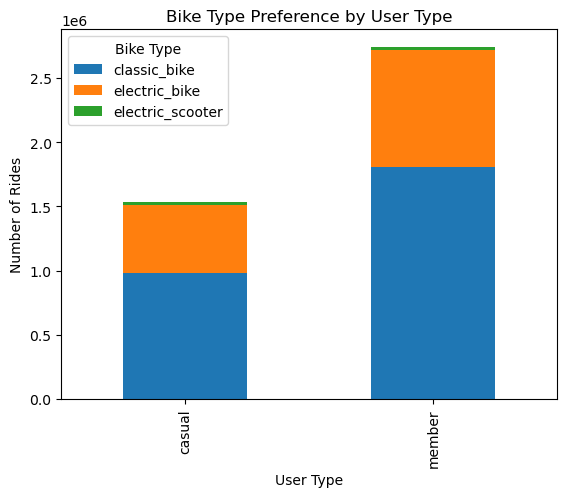

In [28]:
bike_pref = df.groupby(['member_casual', 'rideable_type']).size().reset_index(name='count')
bike_pref_pivot = bike_pref.pivot(index='member_casual', columns='rideable_type', values='count')

# Stacked bar
bike_pref_pivot.plot(kind='bar', stacked=True)
plt.title("Bike Type Preference by User Type")
plt.ylabel("Number of Rides")
plt.xlabel("User Type")
plt.legend(title='Bike Type')
plt.show()
